# Цены на уроки репетитора

## Описание исследования

Онлайн-образование активно развивается, и ученики хотят понимать, сколько будут стоить услуги репетитора еще до выбора специалиста. Однако стоимость занятий зависит от множества факторов: опыта преподавателя, его рейтинга, образования и даже деталей, указанных в описании профиля.

В этом соревновании у вас есть возможность поработать с реальными данными репетиторов и попробовать предсказать их среднюю стоимость за минуту занятий. Вам будут даны:

- Обучающий набор данных (`train.xlsx`) — содержит информацию о репетиторах и их стоимости за минуту.
- Тестовый набор данных (`test.xlsx`) — данные о репетиторах без информации о стоимости (нужно предсказать).
- Файл примера отправки (`sample_submission.csv`) — образец того, как должен выглядеть ваш файл с предсказаниями.

Чтобы успешно решить задачу, вам предстоит обработать текстовые и числовые данные, исследовать важные факторы, влияющие на цену, и построить качественную модель прогнозирования.

**Данные были собраны с различных сайтов, на которых репетиторы размещают информацию о себе и своих услугах.**

В этом соревновании вам предстоит предсказать среднюю стоимость услуг репетитора за минуту (в рублях) на основе различных данных о нем. Вам будут доступны характеристики репетиторов, такие как предмет преподавания, рейтинг, количество отзывов, описание опыта, образование и другие факторы.

Вашей задачей будет построить модель, которая сможет предсказывать стоимость минутной консультации для новых репетиторов на основе предоставленной информации.

*Задача предоставлена в рамках программы классического ML SkillFactory x НИЯУ МИФИ, программы "Машинное обучение с учителем" Яндекс х НИЯУ МИФИ, а также программы "Прикладного анализа данных" Цифровой кафедры НИЯУ МИФИ.*

## Описание датасета

Вам предоставлена различная информация о репетиторах, и вам необходимо спрогнозировать среднюю стоимость минуты занятия у данного репетитора (руб/мин).

- `train.xlsx` — обучающий набор данных.
- `test.xlsx` — тестовый набор данных.
- `sample_submission.csv` — пример файла для отправки результатов в правильном формате.

In [1]:
import pandas as pd
import numpy as np

from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor, StackingRegressor
from sklearn.feature_selection import VarianceThreshold
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression, LinearRegression, RidgeCV, Ridge
from sklearn.model_selection import cross_val_score, KFold, GridSearchCV, train_test_split, RandomizedSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, RobustScaler
from sklearn.svm import SVC, SVR

from scipy.stats import uniform, randint

from xgboost import XGBRegressor

import xgboost as xgb
import lightgbm as lgb
import catboost as cb

import matplotlib.pyplot as plt
import seaborn as sns

import ast

from collections import Counter

from IPython.display import display, Image

## Исследование и анализ датасета

Загрузка данных:

In [2]:
train = pd.read_excel('train.xlsx')
test = pd.read_excel('test.xlsx')

Первичное исследование данных:

In [3]:
train.shape

(4548, 28)

In [4]:
test.shape

(1516, 27)

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4548 entries, 0 to 4547
Data columns (total 28 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        4548 non-null   int64  
 1   предмет           4548 non-null   object 
 2   ФИО               4548 non-null   object 
 3   tutor_head_tags   4548 non-null   object 
 4   tutor_rating      3959 non-null   float64
 5   tutor_reviews     4548 non-null   int64  
 6   description       4547 non-null   object 
 7   experience_desc   2171 non-null   object 
 8   Education_1       4548 non-null   object 
 9   Desc_Education_1  4472 non-null   object 
 10  Education_2       781 non-null    object 
 11  Desc_Education_2  777 non-null    object 
 12  Education_3       106 non-null    object 
 13  Desc_Education_3  105 non-null    object 
 14  Education_4       16 non-null     object 
 15  Desc_Education_4  16 non-null     object 
 16  Ученая степень 1  76 non-null     object 


In [6]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1516 entries, 0 to 1515
Data columns (total 27 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1516 non-null   int64  
 1   предмет           1516 non-null   object 
 2   ФИО               1516 non-null   object 
 3   tutor_head_tags   1516 non-null   object 
 4   tutor_rating      1516 non-null   int64  
 5   tutor_reviews     1516 non-null   int64  
 6   description       1515 non-null   object 
 7   experience_desc   757 non-null    object 
 8   Education_1       1516 non-null   object 
 9   Desc_Education_1  1498 non-null   object 
 10  Education_2       286 non-null    object 
 11  Desc_Education_2  285 non-null    object 
 12  Education_3       34 non-null     object 
 13  Desc_Education_3  34 non-null     object 
 14  Education_4       3 non-null      object 
 15  Desc_Education_4  3 non-null      object 
 16  Ученая степень 1  20 non-null     object 


In [7]:
train.head()

,Unnamed: 0,предмет,ФИО,tutor_head_tags,tutor_rating,tutor_reviews,description,experience_desc,Education_1,Desc_Education_1,...,status,experience,Desc_Education_5,Desc_Education_6,Education_5,Education_6,Ученая степень 2,Ученое звание 2,categories,mean_price
0,0,matematika,Репетитор по математике Емельянова Марина Вла...,"['Школьная программа', 'Подготовка к ЕГЭ', 'По...",5.0,2,Репетитор не предоставил о себе дополн...,NaN,Томский государственный университет им. В.В. ...,"Год окончания: 1990, Факультет: механико-мате...",...,Университетский преподаватель,31 год,NaN,NaN,NaN,NaN,NaN,NaN,"['Школьники с 5 по 9 класс', 'Школьники с 10 п...",16.666667
1,1,matematika,Репетитор по математике Назарова Анастасия Ан...,"['Школьная программа', 'Подготовка к ЕГЭ', 'По...",4.0,7,Репетитор не предоставил о себе дополн...,NaN,Вологодский государственный педагогический ун...,"Год окончания: 2017, Факультет: факультет при...",...,Школьный преподаватель,8 лет,NaN,NaN,NaN,NaN,NaN,NaN,"['Школьники с 5 по 9 класс', 'Школьники с 10 п...",11.666667
2,2,informatika,Репетитор по информатике Мотроненко Инна Конст...,"['Школьная программа', 'Подготовка к ЕГЭ', 'По...",0.0,0,"Выезд за город: Балашиха-1, Балашиха-2...",Московская Школа (учитель ...,Московский городской педагогический университет,"Год окончания: 2008, Факультет: Математически...",...,Школьный преподаватель,11 лет,NaN,NaN,NaN,NaN,NaN,NaN,"['Школьники с 5 по 9 класс', 'Школьники с 10 п...",23.333333
3,3,matematika,Репетитор по математике Логинова Елизавета Ал...,"['Школьная программа', 'Математический анализ'...",4.0,19,"Здравствуйте! Меня зовут Елизавета, о...",NaN,Санкт-Петербургский государственный университет,"Год окончания: 2021, Факультет: физический фа...",...,Частный преподаватель,5 лет,NaN,NaN,NaN,NaN,NaN,NaN,"['Школьники с 1 по 4 класс', 'Школьники с 5 по...",0.116667
4,4,matematika,Репетитор по математике Харланов Олег Викторо...,"['Школьная программа', 'Подготовка к ЕГЭ', 'По...",0.0,0,"Целеустремленный, ориентирован на резу...",преподавателем ...,Приазовский государственный технический униве...,"Год окончания: 2005, Факультет: Энергетически...",...,Частный преподаватель,19 лет,NaN,NaN,NaN,NaN,NaN,NaN,"['Школьники с 5 по 9 класс', 'Школьники с 10 п...",16.666667


In [8]:
test.head()

,Unnamed: 0,предмет,ФИО,tutor_head_tags,tutor_rating,tutor_reviews,description,experience_desc,Education_1,Desc_Education_1,...,Ученое звание 1,status,experience,Desc_Education_5,Desc_Education_6,Education_5,Education_6,Ученая степень 2,Ученое звание 2,categories
0,0,matematika,Репетитор по математике Тихонова Наталья Бори...,"['Школьная программа', 'Подготовка к ЕГЭ', 'Ан...",4,13,Дистанционное убучение по Skype с прим...,NaN,Петрозаводский государственный университет,"Год окончания: 1981, Факультет: физико-матема...",...,NaN,Частный преподаватель,26 лет,NaN,NaN,NaN,NaN,NaN,NaN,"['Школьники с 5 по 9 класс', 'Школьники с 10 п..."
1,1,matematika,Репетитор по математике Худайбердина Милана Р...,"['Школьная программа', 'Математический анализ'...",0,0,Буду рада помочь в освоении дисциплин ...,NaN,"Национальный исследовательский университет ""В...","Год окончания: 2022, Факультет: Московский ин...",...,NaN,Студент,4 года,NaN,NaN,NaN,NaN,NaN,NaN,"['Школьники с 5 по 9 класс', 'Школьники с 10 п..."
2,2,matematika,Репетитор по математике Епихина Елена Вячесла...,"['Школьная программа', 'Подготовка к ЕГЭ', 'По...",0,0,Преподаватель высшей квалификационный ...,Репетитор не предоставил информаци...,"Тамбовский ордена ""Знак Почёта"" государственн...","Год окончания: 1987, Факультет: Математика, С...",...,NaN,"Университетский преподаватель, Школьный препо...",36 лет,NaN,NaN,NaN,NaN,NaN,NaN,"['Школьники с 10 по 11 класс, студенты колледж..."
3,3,matematika,Репетитор по математике Касаткин Денис Евгень...,"['Школьная программа', 'Подготовка к ОГЭ', 'Hi...",4,11,"Объясняю ровно столько, сколько надо. ...",NaN,Тюменский государственный университет,"Год окончания: 2022, Факультет: факультет меж...",...,NaN,Студент,3 года,NaN,NaN,NaN,NaN,NaN,NaN,"['Школьники с 1 по 4 класс', 'Школьники с 5 по..."
4,4,informatika,Репетитор по информатике Логвинов Артём Алекса...,['Подготовка к ЕГЭ'],0,0,"Подготовлю к ЕГЭ, уроки через любую уд...",Репетитор не предоставил информаци...,РТУ МИРЭА,"Год окончания: 2026, Факультет: Программная и...",...,NaN,Студент,1 год,NaN,NaN,NaN,NaN,NaN,NaN,"['Школьники с 10 по 11 класс, студенты колледж..."


In [9]:
train.describe()

,Unnamed: 0,tutor_rating,tutor_reviews,mean_price
count,4548.000000,3959.000000,4548.000000,4548.000000
mean,2273.500000,1.895933,2.989006,16.197949
std,1313.038842,2.280103,8.516939,10.485108
min,0.000000,0.000000,0.000000,0.041667
25%,1136.750000,0.000000,0.000000,10.000000
50%,2273.500000,0.000000,0.000000,15.000000
75%,3410.250000,4.000000,2.000000,20.888889
max,4547.000000,5.000000,152.000000,100.000000


In [10]:
test.describe()

,Unnamed: 0,tutor_rating,tutor_reviews,Desc_Education_6,Education_6,Ученое звание 2
count,1516.000000,1516.000000,1516.000000,0.0,0.0,0.0
mean,757.500000,1.612137,3.003958,NaN,NaN,NaN
std,437.775818,2.198099,8.509982,NaN,NaN,NaN
min,0.000000,0.000000,0.000000,NaN,NaN,NaN
25%,378.750000,0.000000,0.000000,NaN,NaN,NaN
50%,757.500000,0.000000,0.000000,NaN,NaN,NaN
75%,1136.250000,4.000000,2.000000,NaN,NaN,NaN
max,1515.000000,5.000000,118.000000,NaN,NaN,NaN


**Целевая переменная:** `mean_price` (средняя стоимость минуты в рублях) — присутствует только в train.

- В `train` — 4548 репетиторов с 28 признаками, включая целевую переменную `mean_price`.
- В `test` — 1516 репетиторов с теми же признаками, **кроме** `mean_price`, которую нужно предсказать.
- Многие признаки имеют пропуски, особенно связанные с дополнительным образованием (`Education_2`–`Education_6`), учёными степенями/званиями и описанием опыта (`experience_desc`).
- Признаки в основном текстовые (`object`), что потребует тщательной обработки: кодирования категорий, извлечения числовых данных (например, из `experience` или `Desc_Education_X`), работы с пропусками и, возможно, NLP-подходов для полей типа `description`.

## Предобработка данных

Удаление ненужного столбца `Unnamed: 0'`:

In [11]:
train.drop(columns=['Unnamed: 0'], inplace=True)
test.drop(columns=['Unnamed: 0'], inplace=True)

Целевая переменная:

In [12]:
y = train['mean_price']
train.drop(columns=['mean_price'], inplace=True)

Объединение данных для совместной обработки:

In [13]:
df = pd.concat([train, test], ignore_index=True)

Преобразование tutor_head_tags и categories из строки в список:

In [14]:
df['tutor_head_tags'] = df['tutor_head_tags'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else [])
df['categories'] = df['categories'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else [])

Заполнение пропусков в отзывам нулями:

In [15]:
df['tutor_reviews'] = df['tutor_reviews'].fillna(0)

One-hot для 'status' (много меток через запятую — разделим):

In [16]:
df['status'] = df['status'].fillna('unknown').astype(str)
df['status'] = df['status'].apply(lambda x: [s.strip() for s in x.split(',')])

Извлечение числа лет опыта из `experience`:

In [17]:
def extract_experience(exp):
    if pd.isna(exp):
        return np.nan
    exp = str(exp).lower()
    if 'год' in exp or 'лет' in exp:
        try:
            return float(exp.split()[0])
        except:
            return np.nan
    return np.nan

df['experience_years'] = df['experience'].apply(extract_experience)

Заполнение пропусков в `experience_years` медианой по статусу:

In [18]:
# Создаем один числовой признак из статуса для группировки
def get_main_status(status_list):
    """Определяем основной статус из списка"""
    if not isinstance(status_list, list):
        return 'unknown'
    
    # Приоритет статусов
    priority = {
        'Университетский преподаватель': 4,
        'Школьный преподаватель': 3,
        'Частный преподаватель': 2,
        'Студент': 1,
        'Аспирант или ординатор очной формы обучения': 1
    }
    
    # Находим статус с максимальным приоритетом
    max_priority = 0
    main_status = 'unknown'
    for status in status_list:
        if status in priority and priority[status] > max_priority:
            max_priority = priority[status]
            main_status = status
    
    return main_status

# Применяем функцию к уже преобразованному статусу (после ячейки 24)
df['main_status'] = df['status'].apply(get_main_status)

# Группируем по основному статусу
status_median_exp = df.groupby('main_status')['experience_years'].transform('median')
df['experience_years'] = df['experience_years'].fillna(status_median_exp)
df['experience_years'] = df['experience_years'].fillna(df['experience_years'].median())

# Удаляем временный столбец
df.drop(columns=['main_status'], inplace=True)

Преобразование `bool`-столбцов в `int`:

In [19]:
bool_cols = df.select_dtypes(include=['bool']).columns
df[bool_cols] = df[bool_cols].astype(int)

In [20]:
df.describe().round(2)

,tutor_rating,tutor_reviews,experience_years
count,5475.00,6064.00,6064.00
mean,1.82,2.99,10.48
std,2.26,8.51,9.58
min,0.00,0.00,1.00
25%,0.00,0.00,4.00
50%,0.00,0.00,7.00
75%,4.00,2.00,13.00
max,5.00,152.00,68.00


**Результат:**

- все исходные текстовые и избыточные поля удалены.
- числовые признаки (`tutor_rating`, `tutor_reviews`, `experience_years`) приведены к числовому типу и без пропусков.
- категориальные признаки (`status`, `предмет`) преобразованы в one-hot кодированные признаки.
- созданы информативные агрегированные признаки: количество тегов, категорий, образований, учёных степеней/званий, бинарные флаги наличия описаний.
- обучающая и тестовая выборки имеют согласованный набор признаков (18 общих + `mean_price` только в `train_clean`).
- нет пропущенных значений ни в `train_clean`, ни в `test_clean`.

## Feature Engineering

В этом разделе мы создаём новые признаки на основе имеющихся данных, чтобы улучшить предсказательную способность модели. Основные этапы включают:

1. **Извлечение структурированной информации из текстовых полей**:
   - Преобразование `tutor_head_tags` и `categories` из строк в списки.
   - Создание бинарных признаков для популярных тегов (например, "Подготовка к ЕГЭ").
   - Подсчёт количества специализированных тегов (`specialized_tags`).

2. **Извлечение числовых значений из категориальных полей**:
   - Извлечение стажа работы (`experience_years`) из поля `experience`.
   - Нормализация рейтинга (`tutor_rating`) и заполнение пропущенных значений медианой.

3. **Создание бинарных и счётных признаков**:
   - Признаки наличия описания и опыта (`has_description`, `has_experience_desc`).
   - Количество учёных степеней и званий (`degree_count`, `title_count`).
   - Количество записей об образовании (`education_count`).

4. **One-hot кодирование категориальных признаков**:
   - Статус преподавателя (`status_Университетский преподаватель`, `status_Студент` и т.д.).
   - Предмет преподавания (`subject_matematika`, `subject_informatika`).

5. **Создание агрегированных и комбинированных признаков**:
   - Количество тегов и категорий (`n_head_tags`, `n_categories`).
   - Признаки, основанные на отзывах и стаже (`reviews_per_year`, `effective_rating`).
   - Взаимодействие опыта и рейтинга (`exp_rating_interaction`).
   - Признаки наличия ключевых слов в описании (`has_ЕГЭ`, `has_олимпиад` и т.д.).

6. **Нормализация и обработка выбросов**:
   - Ограничение экстремальных значений в `tutor_reviews` и `experience_years`.
   - Масштабирование числовых признаков с помощью `RobustScaler`.

Создание one-hot кодированных признаков для статусов:

In [21]:
all_statuses = set(s for sublist in df['status'] for s in sublist)
for stat in all_statuses:
    df[f'status_{stat}'] = df['status'].apply(lambda x: stat in x).astype(int)

Популярные теги как отдельные признаки:

In [22]:
all_tags = []
for tags in df['tutor_head_tags']:
    if isinstance(tags, list):
        all_tags.extend(tags)

tag_counts = Counter(all_tags)

# Выбираем теги, встречающиеся хотя бы у 1% репетиторов (~60 из 6064)
min_freq = len(df) * 0.01  # ~60
frequent_tags = [tag for tag, cnt in tag_counts.items() if cnt >= min_freq]

print("Частые теги (≥1%):")
for tag, cnt in sorted(tag_counts.items(), key=lambda x: -x[1]):
    if cnt >= min_freq:
        print(f"  {tag}: {cnt}")

# Создаём бинарные признаки
for tag in frequent_tags:
    df[f'tag_{tag[:15]}'] = df['tutor_head_tags'].apply(
        lambda x: tag in x if isinstance(x, list) else False
    ).astype(int)

Частые теги (≥1%):
  Школьная программа: 5661
  Подготовка к ОГЭ: 5100
  Подготовка к ЕГЭ: 3908
  Подготовка к олимпиадам: 898
  Линейная алгебра: 583
  Математический анализ: 508
  Аналитическая геометрия: 387
  Теория вероятности и мат. статистика: 360
  Дифференциальные уравнения: 352
  Математическая логика: 174
  Дискретная математика: 153
  Higher Mathematics in English - высшая математика на английском языке: 104
  ТФКП: 89
  Elementary Mathematics in English: 82


Количество специализированных тегов:

In [23]:
df['specialized_tags'] = df['tutor_head_tags'].apply(
    lambda x: sum(1 for tag in x if tag not in ['Школьная программа']) if isinstance(x, list) else 0
)

Количество указанных степеней/званий:

In [24]:
df['degree_count'] = (
    (~df['Ученая степень 1'].isna()).astype(int) +
    (~df['Ученая степень 2'].isna()).astype(int)
)
df['title_count'] = (
    (~df['Ученое звание 1'].isna()).astype(int) +
    (~df['Ученое звание 2'].isna()).astype(int)
)

Количество записей об образовании:

In [25]:
edu_cols = [f'Education_{i}' for i in range(1, 7)]
df['education_count'] = df[edu_cols].notna().sum(axis=1)

One-hot для `предмет`:

In [26]:
df = pd.get_dummies(df, columns=['предмет'], prefix='subject')

Признаки из количества тегов и категорий:

In [27]:
df['n_head_tags'] = df['tutor_head_tags'].apply(len)
df['n_categories'] = df['categories'].apply(len)

Признак `has_reviews` о том, есть ли отзывы вообще:

In [28]:
df['has_reviews'] = (df['tutor_reviews'] > 0).astype(int)

Студент с опытом:

In [29]:
df['student_with_experience'] = (df['status_Студент'] == 1) & (df['experience_years'] > 3).astype(int)

Наличие ключевых слов в описании:

In [30]:
keywords = ['опыт', 'стаж', 'ЕГЭ', 'олимпиад', 'диплом']
for word in keywords:
    df[f'has_{word}'] = df['description'].fillna('').str.contains(word, case=False, na=False).astype(int)

Количество упоминаний образования:

In [31]:
def count_education_keywords(text):
    if pd.isna(text):
        return 0
    edu_words = ['университет', 'институт', 'академия', 'факультет', 'кафедра']
    return sum(1 for word in edu_words if word in str(text).lower())

df['edu_keywords_count'] = df['Desc_Education_1'].apply(count_education_keywords)

Взаимодействие опыта и рейтинга:

In [32]:
df['exp_rating_interaction'] = df['experience_years'] * df['tutor_rating']

Плотность отзывов (отзывы на год опыта):

In [33]:
df['reviews_density'] = df['tutor_reviews'] / (df['experience_years'] + 1)

Высокий рейтинг и много отзывов:

In [34]:
df['high_rating_many_reviews'] = ((df['tutor_rating'] >= 4) & (df['tutor_reviews'] >= 5)).astype(int)

Уровень преподавателя:

In [35]:
status_mapping = {
    'Студент': 1,
    'Школьный преподаватель': 2,
    'Университетский преподаватель': 3,
    'Частный преподаватель': 4
}
df['status_level'] = df['status'].apply(lambda x: max([status_mapping.get(s, 0) for s in x]) if isinstance(x, list) else 0)

Признак учёной степени:

In [36]:
df['has_academic_title'] = ((df['title_count'] > 0) | (df['degree_count'] > 0)).astype(int)
df.drop(columns=['title_count', 'degree_count'], inplace=True)

Удаление исходных текстовых и списочных столбцов:

In [37]:
text_cols = [
    'ФИО', 'tutor_head_tags', 'description', 'experience_desc',
    'Education_1', 'Desc_Education_1', 'Education_2', 'Desc_Education_2',
    'Education_3', 'Desc_Education_3', 'Education_4', 'Desc_Education_4',
    'Education_5', 'Desc_Education_5', 'Education_6', 'Desc_Education_6',
    'Ученая степень 1', 'Ученое звание 1', 'Ученая степень 2', 'Ученое звание 2',
    'status', 'experience', 'categories'
]

df.drop(columns=text_cols, inplace=True)

Разделение обратно на train и test:

In [38]:
train_clean = df.iloc[:len(train)].copy()
test_clean = df.iloc[len(train):].copy()

Восстановление целевой переменной:

In [39]:
train_clean['mean_price'] = y.values

## Подбор признаков, их анализ и оценка важности

In [40]:
train_clean.describe().round(2)

,tutor_rating,tutor_reviews,experience_years,status_Университетский преподаватель,status_unknown,status_Студент,status_Аспирант или ординатор очной формы обучения,status_Школьный преподаватель,status_Частный преподаватель,tag_Школьная програ,...,has_ЕГЭ,has_олимпиад,has_диплом,edu_keywords_count,exp_rating_interaction,reviews_density,high_rating_many_reviews,status_level,has_academic_title,mean_price
count,3959.00,4548.00,4548.00,4548.00,4548.00,4548.00,4548.00,4548.00,4548.00,4548.00,...,4548.00,4548.00,4548.00,4548.00,3959.00,4548.00,4548.00,4548.00,4548.00,4548.00
mean,1.90,2.99,10.42,0.04,0.00,0.30,0.02,0.13,0.54,0.93,...,0.36,0.12,0.04,1.09,25.19,0.26,0.16,2.81,0.02,16.20
std,2.28,8.52,9.53,0.20,0.05,0.46,0.13,0.34,0.50,0.25,...,0.48,0.32,0.19,0.48,42.26,0.70,0.36,1.37,0.13,10.49
min,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.04
25%,0.00,0.00,4.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,...,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,10.00
50%,0.00,0.00,7.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,...,0.00,0.00,0.00,1.00,0.00,0.00,0.00,4.00,0.00,15.00
75%,4.00,2.00,13.00,0.00,0.00,1.00,0.00,0.00,1.00,1.00,...,1.00,0.00,0.00,1.00,36.00,0.17,0.00,4.00,0.00,20.89
max,5.00,152.00,68.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,...,1.00,1.00,1.00,3.00,340.00,10.22,1.00,4.00,1.00,100.00


Разделение признаков и целевой переменной:

In [41]:
X = train_clean.drop(columns=[
    'mean_price',
    'status_unknown'
])

y = train_clean['mean_price']

Ограничение экстремальных значений в признаках:

In [42]:
X = X.copy()
X['log_reviews'] = np.log1p(X['tutor_reviews'])
X['log_experience'] = np.log1p(X['experience_years'])

Нормализация числовых признаков:

In [43]:
num_cols = ['tutor_rating', 'log_reviews', 'log_experience', 'n_head_tags', 'n_categories']

scaler = RobustScaler()
X.loc[:, num_cols] = scaler.fit_transform(X[num_cols])

In [44]:
# Подготовка test_clean: удаление тех же столбцов
test_clean_prep = test_clean.drop(columns=[
    'has_description', 'status_unknown', 'title_count', 'degree_count'
], errors='ignore')

test_clean_prep = test_clean_prep.copy()
# Ограничение экстремальных значений (как в train)
test_clean_prep['log_reviews'] = np.log1p(test_clean_prep['tutor_reviews'])
test_clean_prep['log_experience'] = np.log1p(test_clean_prep['experience_years'])

to_drop = [
    'tutor_reviews',
    'experience_years',
    'reviews_per_year',
    'reviews_density',
    'exp_rating_interaction',
    'has_description',
    'status_unknown',
    'title_count',
    'degree_count',
    'status_level'
]

X.drop(columns=to_drop, inplace=True, errors='ignore')
test_clean_prep.drop(columns=to_drop, errors='ignore', inplace=True)

test_clean_prep[num_cols] = scaler.transform(test_clean_prep[num_cols])

X = X.fillna(0)
test_clean_prep = test_clean_prep.fillna(0)

Оценка важности признаков с помощью Random Forest:

In [45]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X, y)

,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


Получение важности признаков:

In [46]:
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': model.feature_importances_
}).sort_values('importance', ascending=False)

display(feature_importance.head(15))

,feature,importance
37,log_experience,0.197379
25,n_categories,0.104710
36,log_reviews,0.081637
33,edu_keywords_count,0.045038
30,has_ЕГЭ,0.044000
24,n_head_tags,0.040588
21,education_count,0.038192
20,specialized_tags,0.038127
2,status_Студент,0.035173
28,has_опыт,0.034728


Удаляем признаки с importance < 0.01:

In [47]:
low_importance_features = feature_importance[feature_importance['importance'] < 0.01]['feature'].tolist()
print(f"Удаляем {len(low_importance_features)} маловажных признаков")

X.drop(columns=[col for col in low_importance_features if col in X.columns], inplace=True)
test_clean_prep.drop(columns=[col for col in low_importance_features if col in test_clean_prep.columns], 
                     inplace=True, errors='ignore')

Удаляем 12 маловажных признаков


Проверка корреляции между числовыми признаками:

In [48]:
X.corr()

,tutor_rating,status_Университетский преподаватель,status_Студент,status_Аспирант или ординатор очной формы обучения,status_Школьный преподаватель,status_Частный преподаватель,tag_Школьная програ,tag_Подготовка к ЕГ,tag_Подготовка к ОГ,tag_Подготовка к ол,...,n_categories,has_опыт,has_стаж,has_ЕГЭ,has_олимпиад,has_диплом,edu_keywords_count,has_academic_title,log_reviews,log_experience
tutor_rating,1.000000,0.069507,-0.270238,0.003531,0.067093,0.148652,0.002681,0.100379,0.059738,0.059824,...,0.075170,0.066678,0.012082,0.035748,0.017172,0.015835,-0.017898,-0.059936,0.778056,0.284008
status_Университетский преподаватель,0.069507,1.000000,-0.137431,0.084588,0.070360,-0.225217,-0.090733,0.055165,-0.031295,0.043384,...,0.020432,0.036132,-0.007506,-0.009811,-0.015254,0.001592,0.006379,0.288647,0.076046,0.168856
status_Студент,-0.270238,-0.137431,1.000000,-0.086040,-0.259269,-0.625586,-0.012092,-0.090172,-0.003870,-0.084147,...,-0.024817,-0.042218,-0.065472,0.063187,0.092842,-0.088137,0.059807,-0.086614,-0.279424,-0.592875
status_Аспирант или ординатор очной формы обучения,0.003531,0.084588,-0.086040,1.000000,-0.036089,-0.089383,0.028806,-0.028975,0.015296,0.027697,...,0.016498,0.026284,0.053884,-0.001627,0.052771,0.039730,0.014501,-0.017108,-0.013094,-0.019106
status_Школьный преподаватель,0.067093,0.070360,-0.259269,-0.036089,1.000000,-0.424882,-0.065881,0.020759,0.047846,-0.034740,...,-0.107041,0.012050,0.001579,-0.018352,-0.060519,0.008168,-0.013844,0.063634,0.052422,0.245102
status_Частный преподаватель,0.148652,-0.225217,-0.625586,-0.089383,-0.424882,1.000000,0.067458,0.071524,-0.005672,0.082711,...,0.080183,0.033563,0.043709,-0.013594,-0.033619,0.053929,-0.048604,-0.005175,0.167777,0.299243
tag_Школьная програ,0.002681,-0.090733,-0.012092,0.028806,-0.065881,0.067458,1.000000,-0.046317,0.091974,0.089410,...,0.083070,-0.056406,-0.003637,-0.056254,0.065459,0.029064,0.022732,-0.071603,0.036150,-0.015803
tag_Подготовка к ЕГ,0.100379,0.055165,-0.090172,-0.028975,0.020759,0.071524,-0.046317,1.000000,0.389230,0.175645,...,0.321466,0.043514,0.017502,0.349305,0.111666,0.020796,-0.013665,0.082940,0.097591,0.170479
tag_Подготовка к ОГ,0.059738,-0.031295,-0.003870,0.015296,0.047846,-0.005672,0.091974,0.389230,1.000000,0.110836,...,0.192565,0.033388,0.026149,0.123760,0.017401,0.016697,0.013493,-0.030356,0.067616,0.021862
tag_Подготовка к ол,0.059824,0.043384,-0.084147,0.027697,-0.034740,0.082711,0.089410,0.175645,0.110836,1.000000,...,0.181577,0.042254,0.002943,0.065075,0.273028,0.073432,-0.022242,0.026809,0.081685,0.102185


Наибольшее влияние на стоимость услуг репетитора оказывают: стаж (`experience_years`), количество тегов (`n_head_tags`), число отзывов (`tutor_reviews`) и количество категорий учеников (`n_categories`). Остальные признаки вносят меньший, но ненулевой вклад. Все признаки информативны, явных бесполезных переменных нет.

## Обучение нескольких моделей, их сравнение

In [49]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [50]:
models = {
    'Ridge': Ridge(alpha=1.0),
    'RandomForest': RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1),
    'GradientBoosting': GradientBoostingRegressor(n_estimators=100, random_state=42),
    'SVR': SVR(kernel='rbf', C=1.0, epsilon=0.1),
    'XGBoost': xgb.XGBRegressor(n_estimators=100, random_state=42, verbosity=0),
    'LightGBM': lgb.LGBMRegressor(n_estimators=100, random_state=42, verbose=-1),
    'CatBoost': cb.CatBoostRegressor(n_estimators=100, random_state=42, verbose=False),
    'ExtraTrees': ExtraTreesRegressor(n_estimators=100, random_state=42, verbose=False)
}

Обучение и оценка:

In [51]:
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    mse = mean_squared_error(y_val, y_pred)
    results[name] = mse

for name, mse in sorted(results.items(), key=lambda x: x[1]):
    print(f"{name}: {mse:.4f}")

CatBoost: 97.7315
LightGBM: 99.3286
Ridge: 100.2256
GradientBoosting: 100.5139
XGBoost: 102.4537
RandomForest: 103.1699
SVR: 106.0919
ExtraTrees: 113.1321


Лучшая модель по MSE на валидации — **CatBoost**.

## Подбор гиперпараметров

In [52]:
# Подбор гиперпараметров для CatBoost
print("\\n=== Подбор гиперпараметров для CatBoost ===")

# Определяем сетку параметров для CatBoost
catboost_param_grid = {
    'iterations': [200, 300, 400],          # Количество итераций (деревьев)
    'depth': [4, 6, 8],                     # Глубина деревьев
    'learning_rate': [0.01, 0.05, 0.1],     # Скорость обучения
    'l2_leaf_reg': [1, 3, 5],               # L2 регуляризация
    'border_count': [32, 64, 128],          # Количество границ для количественных признаков
    'random_strength': [0, 1, 2]           # Сила случайности
}

# Создаем CatBoost модель для поиска
cat_model = cb.CatBoostRegressor(
    loss_function='RMSE',
    verbose=False,
    random_seed=42,
    thread_count=-1
)

# Используем RandomizedSearchCV для ускорения поиска
cat_grid = RandomizedSearchCV(
    cat_model,
    catboost_param_grid,
    n_iter=20,              # Проверяем 20 случайных комбинаций
    cv=3,                   # 3-fold кросс-валидация
    scoring='neg_mean_squared_error',
    random_state=42,
    n_jobs=-1,
    verbose=1
)

# Обучаем на тренировочных данных
cat_grid.fit(X_train, y_train)

# Выводим лучшие параметры
print("Лучшие параметры CatBoost:")
for param, value in cat_grid.best_params_.items():
    print(f"  {param}: {value}")
    
cat_val_mse = -cat_grid.best_score_
print(f"Лучший CatBoost MSE: {cat_val_mse:.4f}")

# Сохраняем лучшую модель CatBoost
best_catboost = cat_grid.best_estimator_

\n=== Подбор гиперпараметров для CatBoost ===
Fitting 3 folds for each of 20 candidates, totalling 60 fits
Лучшие параметры CatBoost:
  random_strength: 1
  learning_rate: 0.05
  l2_leaf_reg: 1
  iterations: 300
  depth: 6
  border_count: 64
Лучший CatBoost MSE: 87.6847


In [53]:
xgb_model = XGBRegressor(
    random_state=42,
    verbosity=0,
    tree_method='hist'
)

xgb_param_dist = {
    'n_estimators': [200, 300, 400],
    'max_depth': [4, 5, 6],
    'learning_rate': [0.03, 0.05, 0.07],
    'subsample': [0.8, 0.9],
    'colsample_bytree': [0.7, 0.8],
    'reg_alpha': [0.5, 1.0, 1.5],
    'reg_lambda': [1.0, 1.5, 2.0],
    'min_child_weight': [2, 3, 4]
}

In [54]:
xgb_random = RandomizedSearchCV(
    estimator=xgb_model,
    param_distributions=xgb_param_dist,
    n_iter=100,
    cv=3,
    scoring='neg_mean_squared_error',
    n_jobs=-1,
    verbose=1,
    random_state=42
)

xgb_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


,estimator,"XGBRegressor(...ree=None, ...)"
,param_distributions,"{'colsample_bytree': [0.7, 0.8], 'learning_rate': [0.03, 0.05, ...], 'max_depth': [4, 5, ...], 'min_child_weight': [2, 3, ...], ...}"
,n_iter,100
,scoring,'neg_mean_squared_error'
,n_jobs,-1
,refit,True
,cv,3
,verbose,1
,pre_dispatch,'2*n_jobs'
,random_state,42
,error_score,nan


In [55]:
best_xgb = xgb_random.best_estimator_
display(best_xgb)

# MSE на валидации
val_pred = best_xgb.predict(X_val)
val_mse = mean_squared_error(y_val, val_pred)
print(f"Лучший MSE на валидации: {val_mse:.4f}")

# Проверка переобучения
train_pred = best_xgb.predict(X_train)
train_mse = mean_squared_error(y_train, train_pred)
print(f"Train MSE: {train_mse:.4f}")
print(f"Val MSE:   {val_mse:.4f}")
print(f"Overfit gap: {val_mse - train_mse:.4f} (должно быть >0, но не >>0)")

,objective,'reg:squarederror'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,0.8
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


Лучший MSE на валидации: 97.0008
Train MSE: 61.7078
Val MSE:   97.0008
Overfit gap: 35.2930 (должно быть >0, но не >>0)


## Предсказание на тестовых данных

In [56]:
final_model = cb.CatBoostRegressor(
    iterations=400,          # Количество деревьев (из подбора)
    depth=6,                # Глубина деревьев
    learning_rate=0.05,     # Скорость обучения
    l2_leaf_reg=3,         # L2 регуляризация
    border_count=32,       # Количество границ
    random_strength=1,     # Сила случайности
    loss_function='RMSE',  # Функция потерь
    verbose=False,         # Отключить вывод
    random_seed=42,        # Для воспроизводимости
    thread_count=-1        # Использовать все ядра
)

# Обучаем на всех тренировочных данных
final_model.fit(X, y)

In [57]:
y_pred = final_model.predict(X)

In [58]:
y_pred_test = final_model.predict(test_clean_prep)

In [59]:
submission = pd.DataFrame({
    'index': test.index,
    'mean_price': y_pred_test
})
submission.to_csv('submission.csv', index=False)

In [60]:
# Оценка на тренировочных данных (для информации)
y_pred_train = final_model.predict(X)
train_mse = mean_squared_error(y, y_pred_train)
print(f"MSE на полном тренировочном наборе: {train_mse:.4f}")
print(f"RMSE: {np.sqrt(train_mse):.4f} руб/мин")

# Анализ важности признаков финальной модели
feature_importance_final = pd.DataFrame({
    'feature': X.columns,
    'importance': final_model.feature_importances_
}).sort_values('importance', ascending=False)

print("\nТоп-15 важных признаков финальной модели:")
display(feature_importance_final.head(15))

MSE на полном тренировочном наборе: 66.6608
RMSE: 8.1646 руб/мин

Топ-15 важных признаков финальной модели:


,feature,importance
25,log_experience,14.235395
16,n_categories,8.179243
19,has_ЕГЭ,8.042567
0,tutor_rating,6.971685
24,log_reviews,6.201169
2,status_Студент,5.118855
10,tag_Elementary Math,4.929259
12,education_count,4.863176
11,specialized_tags,3.845966
14,subject_matematika,3.677123


In [61]:
cv_scores = cross_val_score(
    final_model,
    X, y,
    cv=5,
    scoring='neg_mean_squared_error',
    n_jobs=-1
)

cv_mse_scores = -cv_scores
print(f"\nКросс-валидация (5-fold):")
print(f"Среднее MSE: {cv_mse_scores.mean():.4f}")
print(f"Стандартное отклонение: {cv_mse_scores.std():.4f}")
print(f"Диапазон: [{cv_mse_scores.min():.4f}, {cv_mse_scores.max():.4f}]")


Кросс-валидация (5-fold):
Среднее MSE: 88.4695
Стандартное отклонение: 8.3061
Диапазон: [80.0023, 104.2782]


In [62]:
# Разделим данные для проверки
X_temp, X_test_temp, y_temp, y_test_temp = train_test_split(X, y, test_size=0.2, random_state=42)

final_model_temp = RandomForestRegressor(
    n_estimators=200,
    max_depth=15,
    min_samples_split=5,
    min_samples_leaf=2,
    max_features='sqrt',
    random_state=42,
    n_jobs=-1
)

final_model_temp.fit(X_temp, y_temp)

train_score = final_model_temp.score(X_temp, y_temp)
test_score = final_model_temp.score(X_test_temp, y_test_temp)

print(f"\nПроверка на переобучение:")
print(f"R² на тренировочных данных: {train_score:.4f}")
print(f"R² на тестовых данных: {test_score:.4f}")
print(f"Разница: {train_score - test_score:.4f}")

if train_score - test_score > 0.1:
    print("Внимание: возможное переобучение!")
else:
    print("Переобучение в пределах нормы.")


Проверка на переобучение:
R² на тренировочных данных: 0.4859
R² на тестовых данных: 0.1887
Разница: 0.2972
Внимание: возможное переобучение!


## Скриншот с лидерборда Kaggle

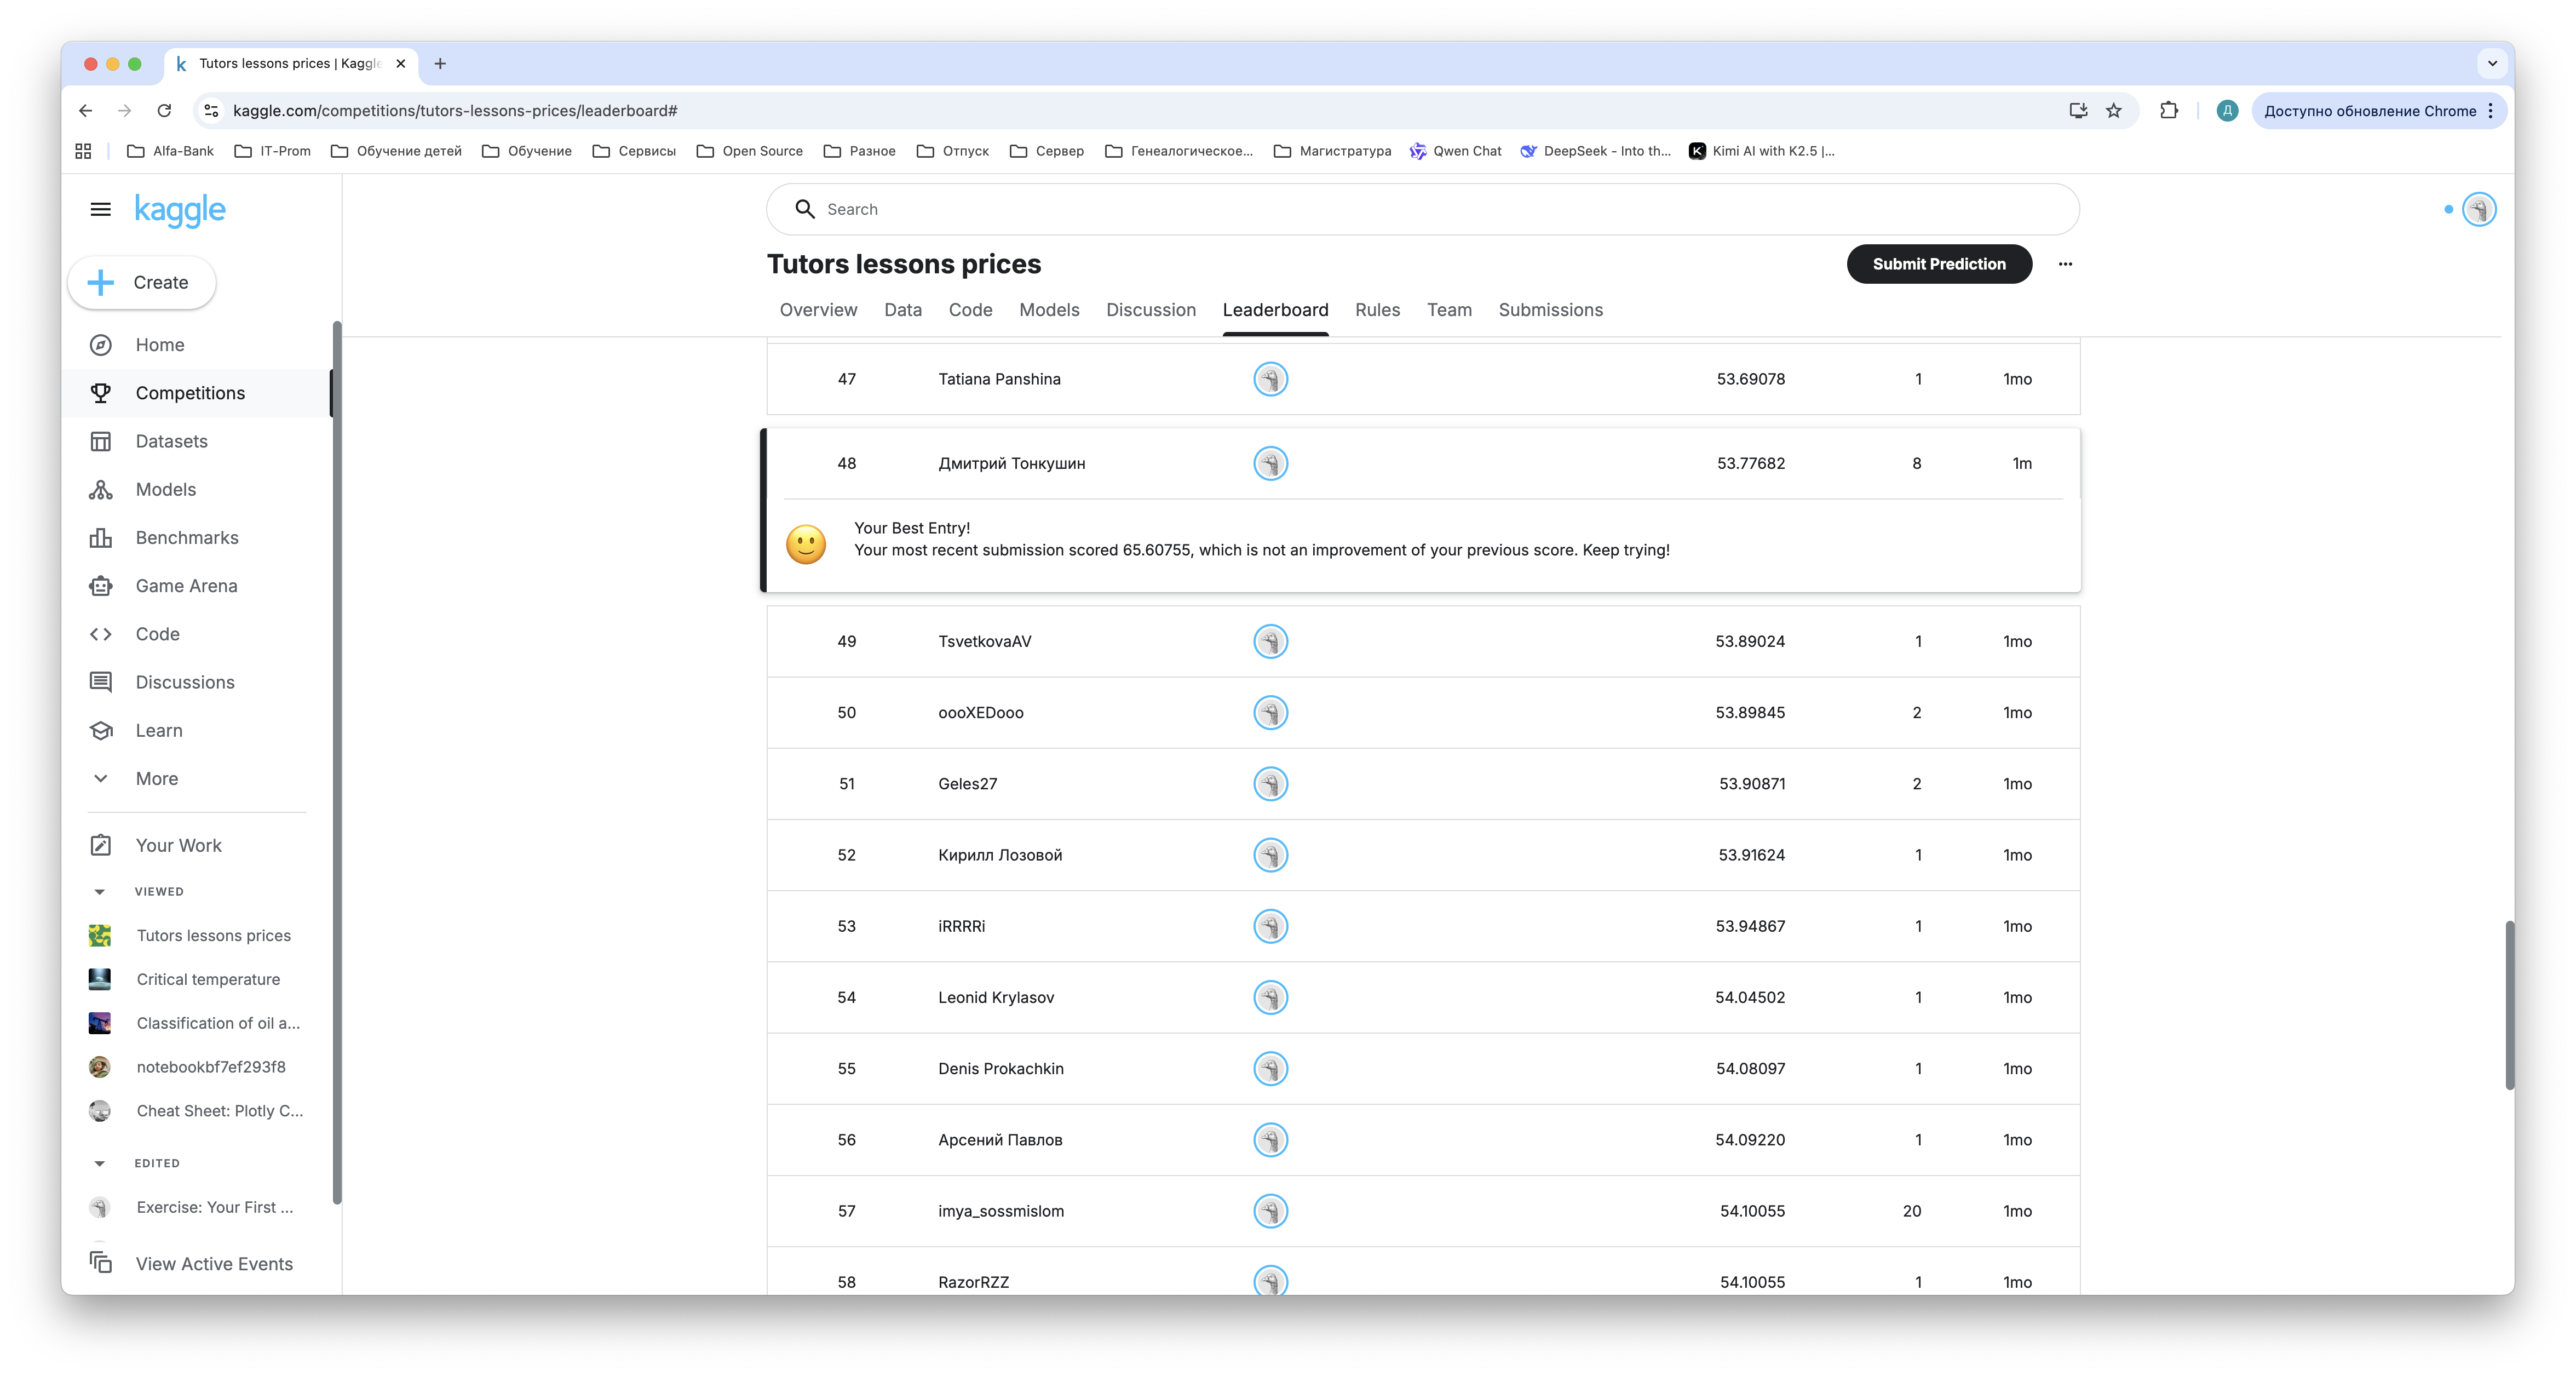

In [63]:
Image(filename='kaggle_leaderboard.png')